# Movement data analysis

Analyze the movement data collected during the experiment

## Import data and libraries

In [10]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from branca.colormap import linear
from geolib import geohash as geolib
import json
import math
import random
import arc_drawer
import numpy as np
import pydeck as pdk

In [11]:
# Defined legend
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 160px; height: 300px; 
                 background-color: white; border:2px solid grey; z-index:9999; 
                 font-size:14px;">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Walking &nbsp; <i class="fa fa-square" style="color:#7FC97F"></i><br>
     &nbsp; On Bicycle &nbsp; <i class="fa fa-square" style="color:#BDAED4"></i><br>
     &nbsp; Train &nbsp; <i class="fa fa-square" style="color:#FDBF85"></i><br>
     &nbsp; Bus &nbsp; <i class="fa fa-square" style="color:#FFFF99"></i><br>
     &nbsp; Electric Bus &nbsp; <i class="fa fa-square" style="color:#FFFF99"></i><br>
     &nbsp; Car &nbsp; <i class="fa fa-square" style="color:#386CB0"></i><br>
     &nbsp; Tram &nbsp; <i class="fa fa-square" style="color:#F0027F"></i><br>
     &nbsp; Plane &nbsp; <i class="fa fa-square" style="color:#BE5B17"></i><br>
     &nbsp; Boat &nbsp; <i class="fa fa-square" style="color:#BE5B17"></i><br>
      </div>
     '''

In [12]:

# Read the data from the csv
df = gpd.read_file('data/Test_movements.csv')
df

,participant_id,start_time,end_time,start_geohash,end_geohash,distance(m),mean_of_transport,original_mean_of_transport,gCO2,is_power_saving,geometry
0,4C5PXH,2025-02-06 17:30:00+00:00,2025-02-06 18:05:03+00:00,u0m44x,u0m46b,1238,WALKING,WALKING,0,False,None
1,4C5PXH,2025-02-06 20:34:52+00:00,2025-02-06 23:16:51+00:00,u0m46b,u0m46b,804,WALKING,WALKING,0,False,None
2,4C5PXH,2025-02-07 07:10:23+00:00,2025-02-07 07:21:52+00:00,u0m46b,u0m46b,586,ON_BICYCLE,ON_BICYCLE,3,False,None
3,4C5PXH,2025-02-07 15:23:36+00:00,2025-02-07 17:33:25+00:00,u0m46b,u0hqgf,108824,TRAIN,TRAIN,761,False,None
4,4C5PXH,2025-02-07 17:46:01+00:00,2025-02-07 18:21:20+00:00,u0hqgf,u0hqg7,1789,ON_BICYCLE,ON_BICYCLE,10,False,None
5,4C5PXH,2025-02-08 08:42:20+00:00,2025-02-08 14:35:16+00:00,u0hmrw,u0hmrz,7110,DETECTION_ERROR,CAR,0,False,None
6,4C5PXH,2025-02-09 10:27:07+00:00,2025-02-09 13:50:04+00:00,u0ht2n,u0hmrz,3770,WALKING,WALKING,0,False,None
7,4C5PXH,2025-02-09 14:20:57+00:00,2025-02-09 16:21:29+00:00,u0hmrz,u0hqg7,40808,CAR,CAR,7590,False,None
8,4C5PXH,2025-02-10 06:36:59+00:00,2025-02-10 08:16:11+00:00,u0hqgv,u0m44x,105696,TRAIN,TRAIN,739,False,None
9,4C5PXH,2025-02-10 17:00:19+00:00,2025-02-10 18:42:27+00:00,u0m41y,u0hqg7,104181,TRAIN,TRAIN,729,False,None


In [13]:
# Show df with time without +00:00
df['start_time'] = df['start_time'].str[:-6]
df['end_time'] = df['end_time'].str[:-6]
df

,participant_id,start_time,end_time,start_geohash,end_geohash,distance(m),mean_of_transport,original_mean_of_transport,gCO2,is_power_saving,geometry
0,4C5PXH,2025-02-06 17:30:00,2025-02-06 18:05:03,u0m44x,u0m46b,1238,WALKING,WALKING,0,False,None
1,4C5PXH,2025-02-06 20:34:52,2025-02-06 23:16:51,u0m46b,u0m46b,804,WALKING,WALKING,0,False,None
2,4C5PXH,2025-02-07 07:10:23,2025-02-07 07:21:52,u0m46b,u0m46b,586,ON_BICYCLE,ON_BICYCLE,3,False,None
3,4C5PXH,2025-02-07 15:23:36,2025-02-07 17:33:25,u0m46b,u0hqgf,108824,TRAIN,TRAIN,761,False,None
4,4C5PXH,2025-02-07 17:46:01,2025-02-07 18:21:20,u0hqgf,u0hqg7,1789,ON_BICYCLE,ON_BICYCLE,10,False,None
5,4C5PXH,2025-02-08 08:42:20,2025-02-08 14:35:16,u0hmrw,u0hmrz,7110,DETECTION_ERROR,CAR,0,False,None
6,4C5PXH,2025-02-09 10:27:07,2025-02-09 13:50:04,u0ht2n,u0hmrz,3770,WALKING,WALKING,0,False,None
7,4C5PXH,2025-02-09 14:20:57,2025-02-09 16:21:29,u0hmrz,u0hqg7,40808,CAR,CAR,7590,False,None
8,4C5PXH,2025-02-10 06:36:59,2025-02-10 08:16:11,u0hqgv,u0m44x,105696,TRAIN,TRAIN,739,False,None
9,4C5PXH,2025-02-10 17:00:19,2025-02-10 18:42:27,u0m41y,u0hqg7,104181,TRAIN,TRAIN,729,False,None


In [14]:
# Count distinct participant_ids
df['participant_id'].nunique()

1

In [15]:
# Remove 2 last characters of geohash
#df['start_geohash'] = df['start_geohash'].str[:-1]
#df['end_geohash'] = df['end_geohash'].str[:-1]

In [16]:
## Convert distance to int
df['distance(m)'] = df['distance(m)'].astype(int)

## Convert gCO2 to int
df['gCO2'] = df['gCO2'].astype(int)

In [17]:
# Get data with mode_of_transport = "PLANE" and original_mode_of_transport = "CAR"
df[(df['mean_of_transport'] == 'PLANE') & (df['original_mean_of_transport'] == 'CAR')]

,participant_id,start_time,end_time,start_geohash,end_geohash,distance(m),mean_of_transport,original_mean_of_transport,gCO2,is_power_saving,geometry


In [18]:
## Get a list of all the unique participants in df, including the number of occurrences of each participant
participants = df['participant_id'].value_counts()
participants

participant_id
4C5PXH    33
Name: count, dtype: int64

In [19]:
## Get the list of movements with each mean of transport
df['mean_of_transport'].value_counts()

mean_of_transport
TRAIN              12
ON_BICYCLE          9
WALKING             5
CAR                 3
BUS                 3
DETECTION_ERROR     1
Name: count, dtype: int64

In [20]:
# Get the distance covered with each mean of transport (in km)
df.groupby('mean_of_transport')['distance(m)'].sum()/1000

mean_of_transport
BUS                  10.282
CAR                  50.415
DETECTION_ERROR       7.110
ON_BICYCLE           57.527
TRAIN              1120.322
WALKING               7.584
Name: distance(m), dtype: float64

In [21]:
# Transform the start_ and end_date to a date only
df['start_time'] = pd.to_datetime(df['start_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.date

In [22]:
df.groupby(['participant_id', 'mean_of_transport', 'start_time'])['distance(m)'].sum()/1000

participant_id  mean_of_transport  start_time
4C5PXH          BUS                2025-02-17     10.282
                CAR                2025-02-09     40.808
                                   2025-02-15      2.781
                                   2025-02-16      6.826
                DETECTION_ERROR    2025-02-08      7.110
                ON_BICYCLE         2025-02-07      2.375
                                   2025-02-12     35.626
                                   2025-02-13      2.038
                                   2025-02-15      3.504
                                   2025-02-16      9.602
                                   2025-02-17      4.382
                TRAIN              2025-02-07    108.824
                                   2025-02-10    209.877
                                   2025-02-11    180.731
                                   2025-02-12    180.395
                                   2025-02-13    108.440
                                   2025-02

In [23]:
# Get the distance covered by each mean of transport per day, per user. On the days where the user used the mean of transport.
dist_per_day = df.groupby(['participant_id', 'mean_of_transport', 'start_time'])['distance(m)'].sum()


# Get the average per mean of transport across all users. Which means the average of the average_dist
mean_daily = dist_per_day.groupby('mean_of_transport').mean()
std_daily = dist_per_day.groupby('mean_of_transport').std()

# Merge and print
daily = pd.concat([mean_daily, std_daily], axis=1)
daily.columns = ['mean', 'std']
daily


,mean,std
mean_of_transport,,
BUS,10282.000000,NaN
CAR,16805.000000,20885.366001
DETECTION_ERROR,7110.000000,NaN
ON_BICYCLE,9587.833333,13047.030320
TRAIN,140040.250000,42802.023833
WALKING,1896.000000,1371.087160


In [24]:
dist_per_day = dist_per_day.reset_index()

In [25]:
# Plot as a violin plot
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_82578/1236318022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=dist_per_day, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis')


<Axes: xlabel='mean_of_transport', ylabel='distance(m)'>

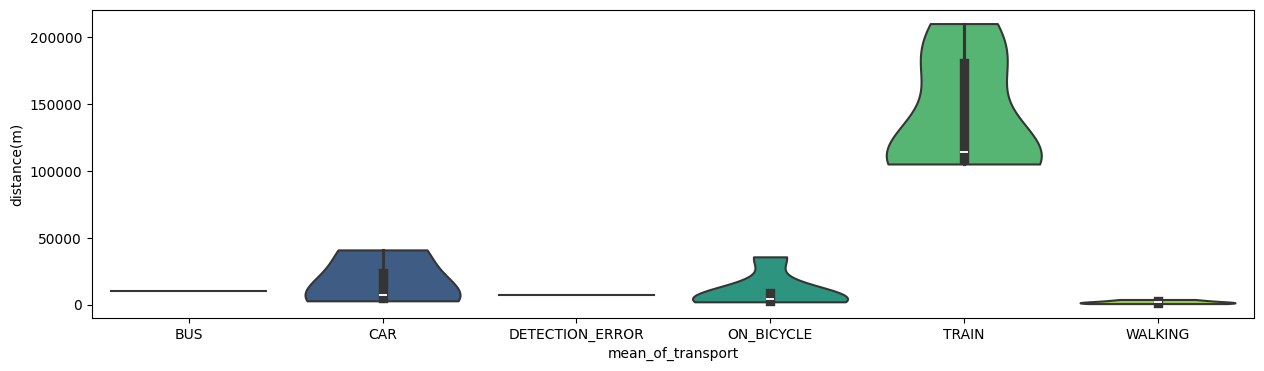

In [26]:
# Plot as violin plot
plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=dist_per_day, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis')

/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_82578/1446108219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=long, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Long distance
/var/folders/0v/mryc8sr57kb1272k8bhj0z083fl3sj/T/ipykernel_82578/1446108219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_of_transport', y='distance(m)', data=short, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Short distance


<Axes: xlabel='mean_of_transport', ylabel='distance(m)'>

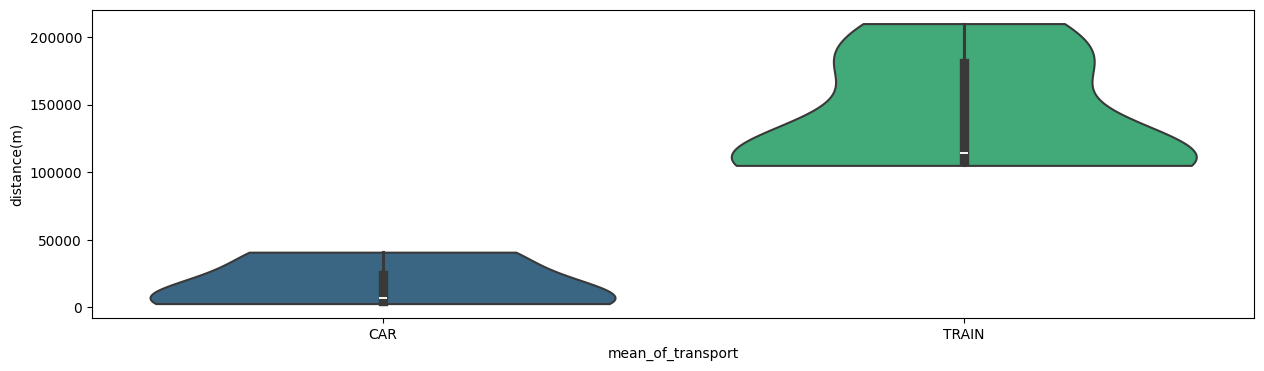

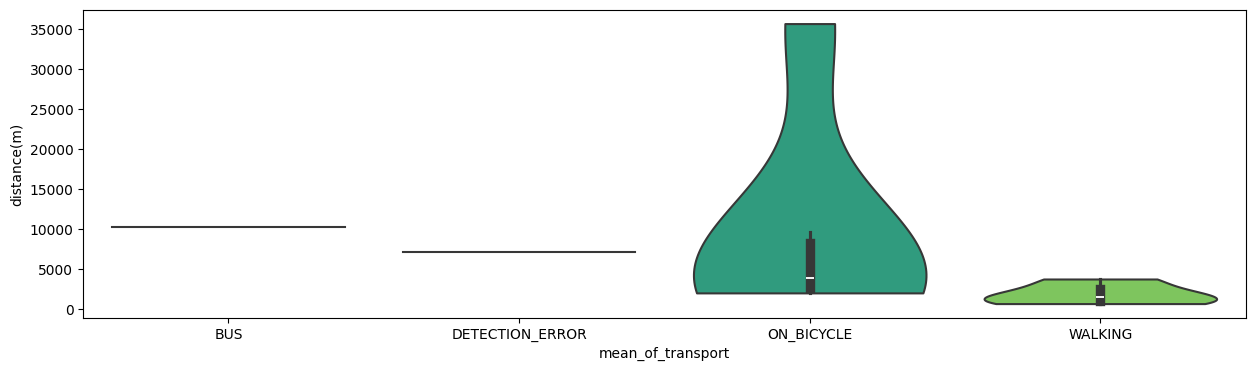

In [27]:
# Separate car, train, boat from the rest and plot
long = dist_per_day[dist_per_day['mean_of_transport'].isin(['CAR', 'TRAIN', 'BOAT'])]
short = dist_per_day[~dist_per_day['mean_of_transport'].isin(['CAR', 'TRAIN', 'BOAT', 'PLANE'])]

plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=long, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Long distance

plt.figure(figsize=(15, 4))
sns.violinplot(x='mean_of_transport', y='distance(m)', data=short, inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='viridis') # Short distance

## Create a visualization of the covered routes

In [28]:
## Get a coordinate from a geohash, adding a small random offset to avoid overlapping
def geohash_to_coordinate(geohash):
    try:
        lat, lon = geolib.decode(geohash)
        #lat = float(lat) + 0.00000001#(random.random() - 0.5) * 0.00000001
        #lon = float(lon) + 0.00000001#(random.random() - 0.5) * 0.00000001
        return [float(lat), float(lon)]
    except:
        return [float(0.0), float(0.0)]

In [29]:
## Draw a path from start_geohash to end_geohash on a folium map
def draw_path(start_geohash, end_geohash, mean_of_transport, map, weight=1, tooltip=None):
    ## Give a different color to each mean of transport
    colors = {
        'WALKING': '#7FC97F',
        'ON_BICYCLE': '#BDAED4',
        'ELECTRIC_BIKE': '#BDAED4',
        'SCOOTER': '#BDAED4',
        'TRAIN': '#FDBF85',
        'BUS': '#FFFF99',
        'ELECTRIC_BUS': '#FFFF99',
        'CAR': '#386CB0',
        'ELECTRIC_CAR': '#386CB0',
        'HYBRID_CAR': '#386CB0',
        'TRAM': '#F0027F',
        'PLANE': '#BE5B17',
        'BOAT': '#BE5B17',
        'BOAT_NO_ENGINE': '#BE5B17',
        'DETECTION_ERROR': '#000000',
        'COACH': '#FFFF99',
    }

    try:
        start_coord = geohash_to_coordinate(start_geohash)
        end_coord = geohash_to_coordinate(end_geohash)

        # Add a small offset to avoid overlapping
        start_coord[0] += (random.random() - 0.5) * 0.001
        start_coord[1] += (random.random() - 0.5) * 0.001
        end_coord[0] += (random.random() - 0.5) * 0.001
        end_coord[1] += (random.random() - 0.5) * 0.001

        #arc_drawer.draw_arc(map, start_coord[0], start_coord[1], end_coord[0], end_coord[1], color=colors[mean_of_transport], weight = weight)

        folium.PolyLine(locations=[start_coord, end_coord], color=colors[mean_of_transport], weight=weight, tooltip=tooltip).add_to(map)
    except Exception as e:
        print(e)
        print(start_geohash, end_geohash)


In [57]:
## Create the actual folium map
m = folium.Map(location=[46.9446011, 7.4143311], zoom_start=6, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')

# Count the number of movements with the same combination of start_geohash and end_geohash (or vice-versa)
df['start_end_geohash'] = df['start_geohash'] + df['end_geohash']
df['end_start_geohash'] = df['end_geohash'] + df['start_geohash']

## Get the number of movements with the same combination of start_geohash and end_geohash (or vice-versa)
start_end = df['start_end_geohash'].value_counts()
end_start = df['end_start_geohash'].value_counts()

## Create a list with the sum of the two previous lists, when the index is the same
combined = {}

for index, row in start_end.items():
    if index in end_start:
        combined[index] = row + end_start[index]
    else:
        combined[index] = row

for index, row in end_start.items():
    if index not in combined:
        combined[index] = row

## Convert combined to series
combined = pd.Series(combined)

# Log scaling
combined = combined.apply(lambda x: math.log(x) + 1)

# Draw path for each movement in start_end
for index, row in combined.items():
    start_geohash = index[0:len(index)//2]
    end_geohash = index[len(index)//2:len(index)] 

    try:
        mean_of_transport = df.loc[(df['start_geohash'] == start_geohash) & (df['end_geohash'] == end_geohash), 'mean_of_transport'].iloc[0]
    except:
        mean_of_transport = df.loc[(df['end_geohash'] == start_geohash) & (df['start_geohash'] == end_geohash), 'mean_of_transport'].iloc[0]

    draw_path(start_geohash, end_geohash, mean_of_transport, m, weight = row/max(combined)*7)

## Draw a path for each movement
#for index, row in df.iterrows():
#    draw_path(row['start_geohash'], row['end_geohash'], row['mean_of_transport'], m)

## Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

## Save the map as an html file
m.save('maps/paths_map.html')


## Create a heatmap of the locations visited

In [22]:
## Extract from df a list of all start_geohashes and end_geohashes
geohashes = list(df['start_geohash']) + list(df['end_geohash'])
len(geohashes)

1498

In [23]:
# If we want, we can remove some characters from the end of each geohash to reduce the precision
geohashes = [geohash[:-1] for geohash in geohashes]

In [24]:
# Convert the list of geohashes to a dataframe
geohashes_df = gpd.GeoDataFrame(geohashes, columns=['geohash'])

## Convert the list of geohashes to a geoJSON object


In [25]:
## Convert geohashes to a heatmap in geojson format
def geohashes_to_heatmap(df):
    # Get the distinct geohashes and their counts from the dataframe
    geohashes = df['geohash'].value_counts()

    # Get the maximum count of any geohash
    max_count = math.log(geohashes.max())

    # Convert the geohashes to a list of lists, each containing the geohash and its count
    geohashes = [[geohash, count] for geohash, count in zip(geohashes.index, geohashes)]
    
    # Create a color scale for the heatmap
    color_scale = linear.RdYlBu_10.scale(1, max_count)

    # Convert geohashes to features for geoJSON
    features = []

    for geohash in geohashes:
        # Get the bounds of the geohash
        bounds = geolib.bounds(geohash[0])
        color = color_scale(math.log(geohash[1]))

        # Create a feature for the geohash
        features.append({
            "type": "Feature",
            "properties": {
                "id": geohash[0],
                "fillColor": color,
                "fillOpacity": 0.6,
                "stroke": False
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [bounds.sw.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.sw.lat]
                ]]
            },
        })

    # Convert the geohashes to a heatmap in geojson format
    return {
        "type" : "FeatureCollection",
        "features": features
    }

In [26]:
# Convert the geohashes to a heatmap in geojson format
heatmap = geohashes_to_heatmap(geohashes_df)

# Save GeoJSON with double quotes
with open('results/heatmap.geojson', 'w') as f:
    json.dump(heatmap, f)

In [27]:
# Visualize as a heatmap using Folium
# Create a folium map centered at an initial location
def create_map(geojson, mapname, legend=None):
    m = folium.Map(location=[46.9446011, 7.4143311],zoom_start=6, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')

    # Define a style function to set the color of the polygon
    def style_function(feature):
        return {
            'fillColor': feature["properties"]["fillColor"],  # Change this to the desired color
            'stroke': feature["properties"]["stroke"],
            'fillOpacity': feature["properties"]["fillOpacity"],
        }

    # Add GeoJSON data to the map with the style function
    folium.GeoJson(
        geojson,
        name='Polygon Layer',
        style_function=style_function,
    ).add_to(m)

    # Add Layer Control to the map
    folium.LayerControl().add_to(m)

    if legend:
        m.get_root().html.add_child(folium.Element(legend))

    # Save or display the map
    m.save("maps/"+mapname)


In [28]:
create_map(heatmap, "heatmap.html")

In [29]:
!open -a Arc maps/heatmap.html

## Get the map of the most used vehicles

In [ ]:
## Get the list of geohashes with the corresponding mean of transport
geohashes = df[['start_geohash', 'mean_of_transport']].copy()
## Append the end_geohashes to the list of geohashes
geohashes = gpd.GeoDataFrame(pd.concat([geohashes, df[['end_geohash', 'mean_of_transport']]]))
## Merge start_geohashes and end_geohashes into a single column
geohashes['geohash'] = geohashes['start_geohash'].combine_first(geohashes['end_geohash'])
## Remove the start_geohashes and end_geohashes columns
geohashes = geohashes[['geohash', 'mean_of_transport']]

## Reduce precision of geohashes
geohashes['geohash'] = geohashes['geohash'] #.str[:-1]

geohashes

In [ ]:
## Find the mean of transport that occurs the more often for each geohash and keep only the first one (the most used)
geohashes_df = gpd.GeoDataFrame(geohashes, columns=['geohash', 'mean_of_transport'])
# Get the count of the mean of transport for each geohash
geohashes_df = geohashes_df.groupby(['geohash', 'mean_of_transport']).size().reset_index(name='counts')
# For each geohash, keep only the mean of transport that occurs the most often
geohashes_df = geohashes_df.sort_values('counts', ascending=False).drop_duplicates(['geohash'])
# Remove the counts column
#geohashes_df = geohashes_df[['geohash', 'mean_of_transport']]
geohashes_df

In [60]:
## Convert geohashes to a heatmap in geojson format
def heatmap_mot(df):
    ## Give a different color to each mean of transport
    colors = {
        'WALKING': '#7FC97F',
        'ON_BICYCLE': '#BDAED4',
        'ELECTRIC_BIKE': '#BDAED4',
        'SCOOTER': '#BDAED4',
        'TRAIN': '#FDBF85',
        'BUS': '#FFFF99',
        'ELECTRIC_BUS': '#FFFF99',
        'CAR': '#386CB0',
        'ELECTRIC_CAR': '#386CB0',
        'HYBRID_CAR': '#386CB0',
        'TRAM': '#F0027F',
        'PLANE': '#BE5B17',
        'BOAT': '#BE5B17'
    }

    # Convert geohashes to features for geoJSON
    features = []

    for geohash in df:
        # Get the bounds of the geohash
        bounds = geolib.bounds(geohash[0])
        color = colors[geohash[1]]

        # Create a feature for the geohash
        features.append({
            "type": "Feature",
            "properties": {
                "id": geohash[0],
                "fillColor": color,
                "fillOpacity": 0.8,
                "stroke": False
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [bounds.sw.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.ne.lat],
                    [bounds.ne.lon, bounds.sw.lat],
                    [bounds.sw.lon, bounds.sw.lat]
                ]]
            },
        })

    # Convert the geohashes to a heatmap in geojson format
    return {
        "type" : "FeatureCollection",
        "features": features
    }

In [ ]:
# Convert the means of transport to a heatmap in geojson format
heatmap = heatmap_mot(geohashes_df.values)

# Save GeoJSON with double quotes
with open('results/heatmap_mot.geojson', 'w') as f:
    json.dump(heatmap, f)

In [97]:
create_map(heatmap, "heatmap_mot.html", legend_html)

In [98]:
!open -a Arc maps/heatmap_mot.html

## Get the map of the movements (start to end point)

In [30]:
# Now we should create a map with lines between the geohashes, with the color of the line corresponding to the mean of transport
# We should also create a legend for the map

## Create the actual folium map
m = folium.Map(location=[46.9446011, 7.4143311], zoom_start=8, tiles='https://tiles.stadiamaps.com/tiles/stamen_toner_lite/{z}/{x}/{y}{r}.png?api_key=977802c5-9b2e-4fc3-9254-a9199d0d5d0c', attr='https://stadiamaps.com/')
# Draw a path for each movement
for index, row in df.iterrows():
    draw_path(row['start_geohash'], row['end_geohash'], row['mean_of_transport'], m, weight = 2, tooltip=row['participant_id'])


## Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

## Save the map as an html file
m.save('maps/paths_map_mot.html')

!open -a Arc maps/paths_map_mot.html

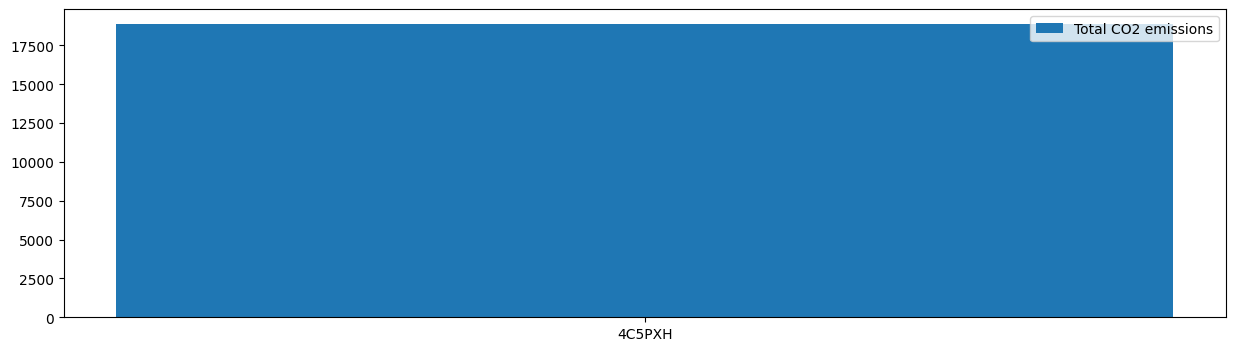

In [31]:
# Compute the total CO2 emissions for each person
df_co2 = df.groupby('participant_id')['gCO2'].sum()

# Plot the total CO2 emissions for each person in a bar plot, together with the average CO2 emissions per km in different bars
plt.figure(figsize=(15, 4))
plt.bar(df_co2.index, df_co2, label='Total CO2 emissions')
plt.legend()
plt.show()

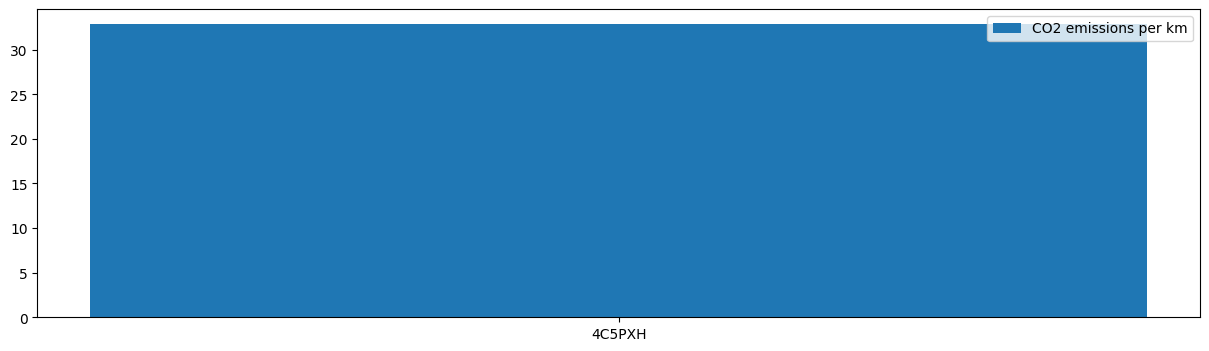

In [32]:
# Compute the emissions per km for each person
df['gCO2_per_km'] = df['gCO2'] / df['distance(m)'] * 1000
df['gCO2_per_km'] = df['gCO2_per_km'].replace([np.inf, -np.inf], np.nan)

# Plot the emissions per km for each person in a bar plot
df_co2_per_km = df.groupby('participant_id')['gCO2_per_km'].mean()
plt.figure(figsize=(15, 4))
plt.bar(df_co2_per_km.index, df_co2_per_km, label='CO2 emissions per km')
plt.legend()
plt.show()


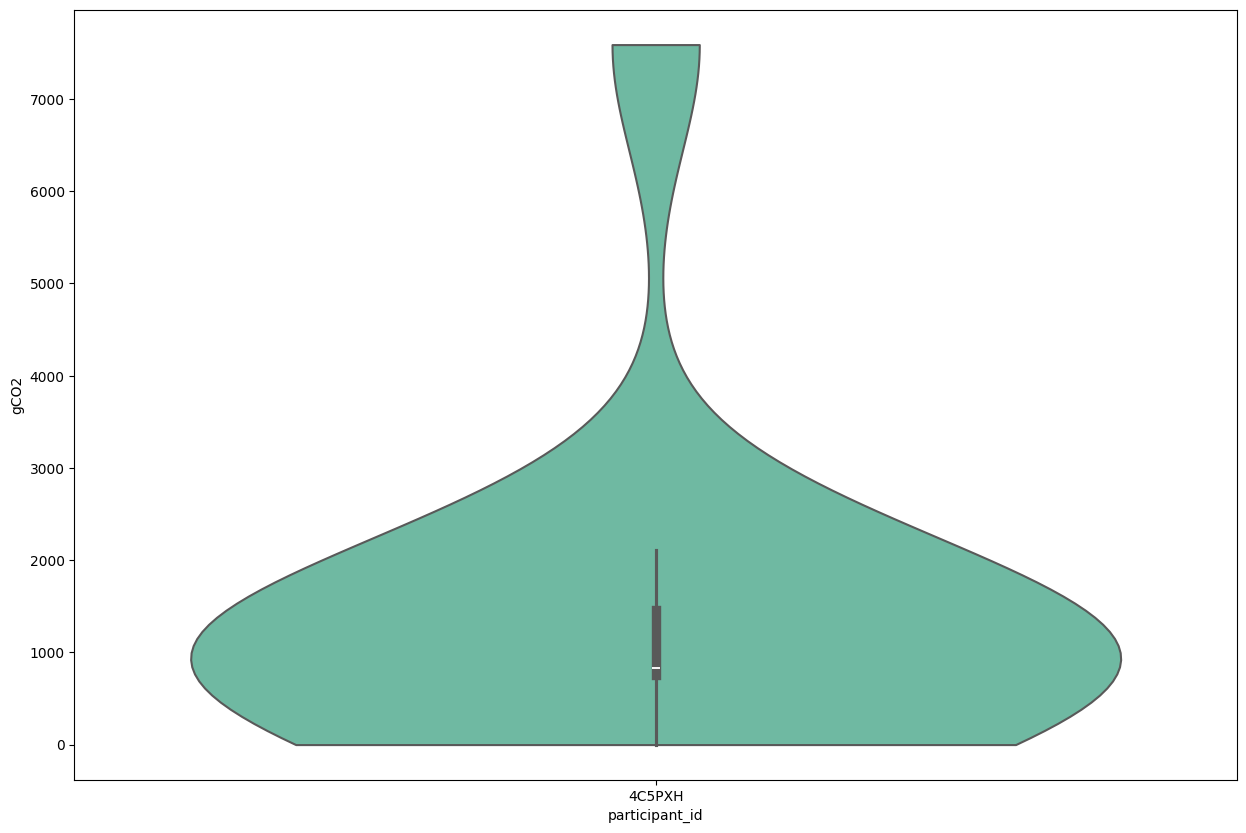

In [33]:
# Compute the emissions per day (using start time) for each person
df['start_time'] = pd.to_datetime(df['start_time'])
df['day'] = df['start_time'].dt.date
df_co2_per_day = df.groupby(['participant_id', 'day'])['gCO2'].sum()

# Plot emissions per day for each person in a violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(x='participant_id', y='gCO2', data=df_co2_per_day.reset_index(), inner='box', linewidth=1.5, saturation=0.8, width=0.8, cut=0, palette='Set2', hue='participant_id')
plt.show()

In [34]:
# Reduce precision of geohash by 1 character for the rows where we covered a long distance (more than 10 km)
df['start_geohash'] = df.apply(lambda x: x['start_geohash'][:-1] if x['distance(m)'] > 10000 else x['start_geohash'], axis=1)
df['end_geohash'] = df.apply(lambda x: x['end_geohash'][:-1] if x['distance(m)'] > 10000 else x['end_geohash'], axis=1)

In [35]:
# Define colors for each mode of transport
alpha = 128
colors = {
    'WALKING': [70, 130, 180, alpha],      # Steel Blue (distinct blue for walking)
    'ON_BICYCLE': [100, 149, 237, alpha],  # Cornflower Blue (different blue for bike)
    'ELECTRIC_BIKE': [100, 149, 237, alpha],
    'SCOOTER': [100, 149, 237, alpha],
    'TRAIN': [0, 191, 255, alpha],         # Deep Sky Blue (different blue for train)
    'BUS': [255, 182, 193, alpha],         # Light Pink (distinct from car/tram/plane)
    'ELECTRIC_BUS': [255, 182, 193, alpha],
    'COACH': [255, 182, 193, alpha],
    'CAR': [255, 105, 180, alpha],        # Hot Pink (distinct for car)
    'ELECTRIC_CAR': [255, 105, 180, alpha],
    'HYBRID_CAR': [255, 105, 180, alpha],
    'TRAM': [255, 160, 122, alpha],       # Light Salmon Pink (distinct from bus and car)
    'PLANE': [255, 105, 180, alpha],      # Hot Pink (same as car, but could be changed if needed)
    'BOAT': [255, 105, 180, alpha],       # Hot Pink
    'BOAT_NO_ENGINE': [255, 105, 180, alpha],
    'DETECTION_ERROR': [0, 0, 0, alpha],  # Black
}

In [36]:
df.size

429

In [37]:
# IF two movements from the same user have the same start geohash and start time, we should merge them into a single movement (keep the one with the highest distance)
df['start_time'] = pd.to_datetime(df['start_time'])

# Group by participant_id, start_geohash, start_time and maximum distance, keep all the other data from the row with the maxium distance
df = df.groupby(['participant_id', 'start_geohash', 'start_time'])['distance(m)'].max().reset_index().merge(df, on=['participant_id', 'start_geohash', 'start_time', 'distance(m)'])

In [38]:
df.size

416

In [39]:
# Get only the rows with distance smaller than 10km
'''
df_copy = df.copy()
df = df[df['distance(m)'] < 10000]
'''

"\ndf_copy = df.copy()\ndf = df[df['distance(m)'] < 10000]\n"

In [40]:
# Get only the rows with distance bigger than 10km
'''
df = df_copy.copy()
df_copy = df.copy()
df = df[df['distance(m)'] > 10000]
'''

"\ndf = df_copy.copy()\ndf_copy = df.copy()\ndf = df[df['distance(m)'] > 10000]\n"

In [ ]:
# Process all paths in one step
df['start_coords'] = df['start_geohash'].apply(geohash_to_coordinate)
df['end_coords'] = df['end_geohash'].apply(geohash_to_coordinate)

# Add slight offsets to avoid overlaps
df['start_coords'] = df['start_coords'].apply(lambda x: [x[1] + (random.random() - 0.5) * 0.001, x[0] + (random.random() - 0.5) * 0.001])
df['end_coords'] = df['end_coords'].apply(lambda x: [x[1] + (random.random() - 0.5) * 0.001, x[0] + (random.random() - 0.5) * 0.001])

'''
# Add random height to the start and end coordinates
df['start_coords'] = df['start_coords'].apply(lambda x: [x[0], x[1], random.randint(10000, 20000)])
df['end_coords'] = df['end_coords'].apply(lambda x: [x[0], x[1], random.randint(10000, 20000)])
'''

# Create data list for Pydeck
path_data = df[['start_coords', 'end_coords', 'mean_of_transport', 'participant_id']].copy()
path_data['color'] = path_data['mean_of_transport'].apply(lambda x: colors.get(x, [0, 0, 0])) # Default black for unknown transport
path_data['color_start'] = path_data['color'].apply(lambda x: [xi * 0.7 for xi in x])  # Slightly darker starting color

# Pydeck ArcLayer (Curved Lines)
layer = pdk.Layer(
    "ArcLayer",
    data=path_data,
    get_source_position="start_coords",
    get_target_position="end_coords",
    get_source_color="color_start",
    get_target_color="color",
    get_color="color", # for linelayer
    get_width=1,
    get_height = 1, # Change the height of the arc, negative values make it go down
    pickable=True,
    auto_highlight=True,
)

# Define map view
view_state = pdk.ViewState(
    latitude=df['start_coords'].iloc[0][1],  # Center on first start point
    longitude=df['start_coords'].iloc[0][0],
    zoom=8,
    pitch=80,  # Adds some 3D depth for better arc visibility
)

# Render and save
deck = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{participant_id} - {mean_of_transport}"})
deck.to_html("maps/paths_map_mot.html")

# Open in browser
!open -a Arc maps/paths_map_mot.html

In [ ]:
# Group trips that were from the same start and end geohash and vehicle, to reduce clutter
grouped = df.groupby(['start_geohash', 'end_geohash', 'mean_of_transport']).size().reset_index(name='counts')

# Get coordinates from geohashes
grouped['start_coords'] = grouped['start_geohash'].apply(geohash_to_coordinate)
grouped['end_coords'] = grouped['end_geohash'].apply(geohash_to_coordinate)

# Add slight offsets to avoid overlaps
grouped['start_coords'] = grouped['start_coords'].apply(lambda x: [x[1] + (random.random() - 0.5) * 0.001, x[0] + (random.random() - 0.5) * 0.001])
grouped['end_coords'] = grouped['end_coords'].apply(lambda x: [x[1] + (random.random() - 0.5) * 0.001, x[0] + (random.random() - 0.5) * 0.001])

# Create data list for Pydeck
path_data = grouped[['start_coords', 'end_coords', 'mean_of_transport', 'counts']].copy()
path_data['color'] = path_data['mean_of_transport'].apply(lambda x: colors.get(x, [0, 0, 0])) # Default black for unknown transport
path_data['color_start'] = path_data['color'].apply(lambda x: [xi * 0.7 for xi in x])  # Slightly darker starting color

# Get maxium count for scaling - then scale with a log scale, with minimum 1 width and maximum 5
max_count = path_data['counts'].max()
path_data['width'] = path_data['counts'].apply(lambda x: max(1, min(5, math.log(x + 1) / math.log(max_count + 1) * 5)))

# Pydeck ArcLayer (Curved Lines)
layer = pdk.Layer(
    "ArcLayer",
    data=path_data,
    get_source_position="start_coords",
    get_target_position="end_coords",
    get_source_color="color_start",
    get_target_color="color",
    get_width="width",  # Scale width based on counts
    pickable=True,
    auto_highlight=True,
)

# Define map view
view_state = pdk.ViewState(
    latitude=df['start_coords'].iloc[0][1],  # Center on first start point
    longitude=df['start_coords'].iloc[0][0],
    zoom=8,
    pitch=30,  # Adds some 3D depth for better arc visibility
)

# Render and  save
deck = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{mean_of_transport} - {counts}"})
deck.to_html("maps/paths_map_mot_grouped.html")

# Open in browser
!open -a Arc maps/paths_map_mot_grouped.html

In [44]:
# Print distances by train, average, median and standard deviation
train = df[df['mean_of_transport'] == 'TRAIN']['distance(m)']

print('Train distances:')
print('Average:', train.mean())
print('Median:', train.median())

print(train.describe())

print(train)

Train distances:
Average: 93360.16666666667
Median: 104938.5
count        12.000000
mean      93360.166667
std       24136.897363
min       51926.000000
25%       75793.250000
50%      104938.500000
75%      108536.000000
max      118817.000000
Name: distance(m), dtype: float64
2     105696
3     114606
5     108440
6      53071
7     108241
18     79016
20     51926
21     66125
22    104181
23    101379
26    108824
27    118817
Name: distance(m), dtype: int64
